In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Primary investigation

In [24]:
!ls

churn_1_1.1.ipynb  telco-customer-churn


In [25]:
# data = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data = pd.read_csv("telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [26]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [27]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Tenure

The expected tenure of a customer in any given segment is inversely proportional to the churn rate, as the expected lifetime in months is 1/(churn rate), if using the monthly churn rate. Therefore, for customers with similar monthly revenue, lifetime value is the opposite of their churn rate.

In [29]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [30]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

this column is already encoded

In [31]:
data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [32]:
data['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [33]:
data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [34]:
for i in data.columns:
    if (data[i].dtype == object) and (i != 'customerID') :
        print('\n' + 'Column Name: '+i)
        print(data[i].value_counts())


Column Name: gender
Male      3555
Female    3488
Name: gender, dtype: int64

Column Name: Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

Column Name: Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

Column Name: PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

Column Name: MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Column Name: InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Column Name: OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

Column Name: OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

Column Name: DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DevicePr

In [35]:
data.groupby('Churn').count()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,,
No,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174
Yes,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


In [36]:
data['InternetService'].groupby(data['Churn']).value_counts()

Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    Fiber optic        1297
       DSL                 459
       No                  113
Name: InternetService, dtype: int64

I'm assuming that all internet related services are not available if there is no internet services. Analysing this below.

In [37]:
no_internets = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [38]:
len(no_internets)

7

In [39]:
for i in no_internets:
    print('\n')
    print(data[i].groupby(data['Churn']).value_counts())



Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    Fiber optic        1297
       DSL                 459
       No                  113
Name: InternetService, dtype: int64


Churn  OnlineSecurity     
No     No                     2037
       Yes                    1724
       No internet service    1413
Yes    No                     1461
       Yes                     295
       No internet service     113
Name: OnlineSecurity, dtype: int64


Churn  OnlineBackup       
No     Yes                    1906
       No                     1855
       No internet service    1413
Yes    No                     1233
       Yes                     523
       No internet service     113
Name: OnlineBackup, dtype: int64


Churn  DeviceProtection   
No     No                     1884
       Yes                    1877
       No internet service    1413
Yes    No                     1211
       Yes                     545
   

so, my assumptions seems to be right, let's be sure.

In [40]:
for i in no_internets:
    if (i !='InternetService'):
        print('\n')
        print(data[i].groupby(data['InternetService']).value_counts())



InternetService  OnlineSecurity     
DSL              No                     1241
                 Yes                    1180
Fiber optic      No                     2257
                 Yes                     839
No               No internet service    1526
Name: OnlineSecurity, dtype: int64


InternetService  OnlineBackup       
DSL              No                     1335
                 Yes                    1086
Fiber optic      No                     1753
                 Yes                    1343
No               No internet service    1526
Name: OnlineBackup, dtype: int64


InternetService  DeviceProtection   
DSL              No                     1356
                 Yes                    1065
Fiber optic      No                     1739
                 Yes                    1357
No               No internet service    1526
Name: DeviceProtection, dtype: int64


InternetService  TechSupport        
DSL              No                     1243
                 Ye

In [41]:
data[data['InternetService'] == 'No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No


In [42]:
data[(data['InternetService'] == 'No') & (data['StreamingTV'] == 'No internet service')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No


## Visualization

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

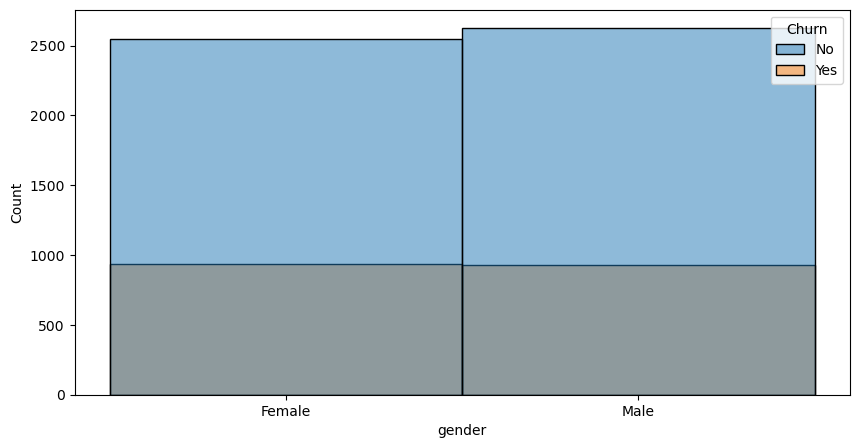

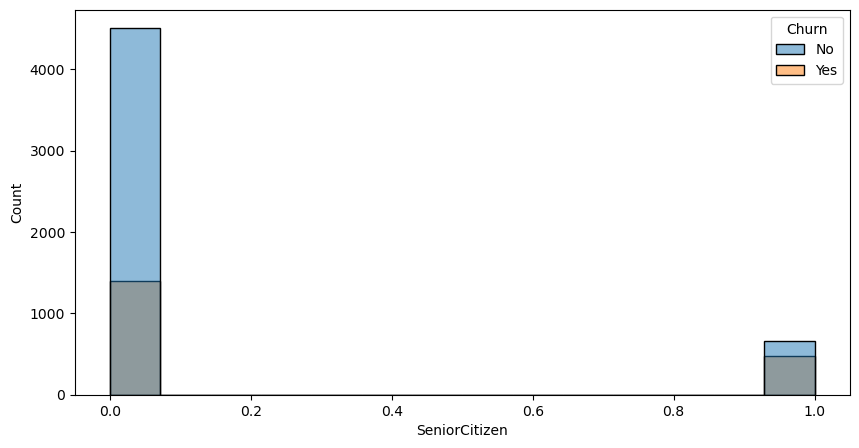

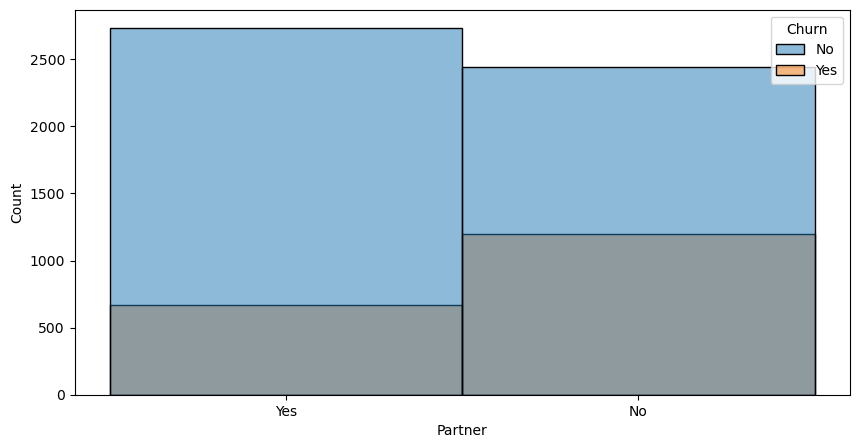

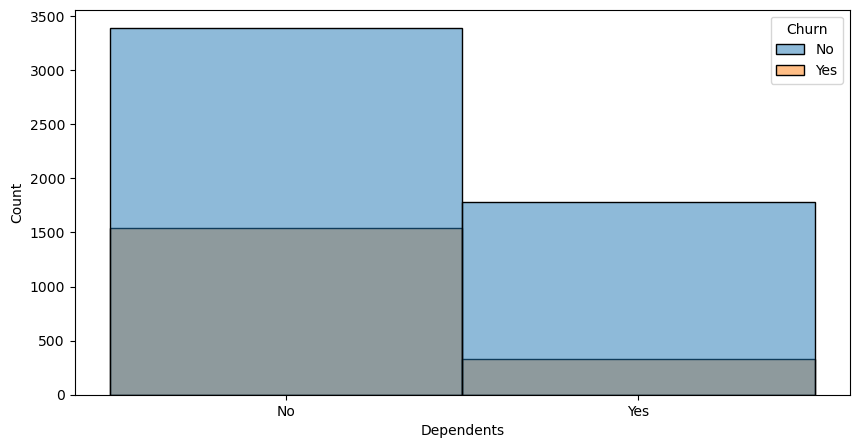

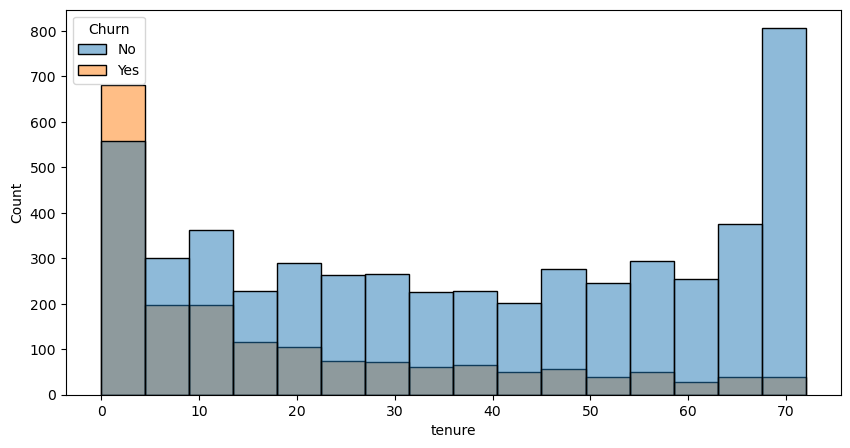

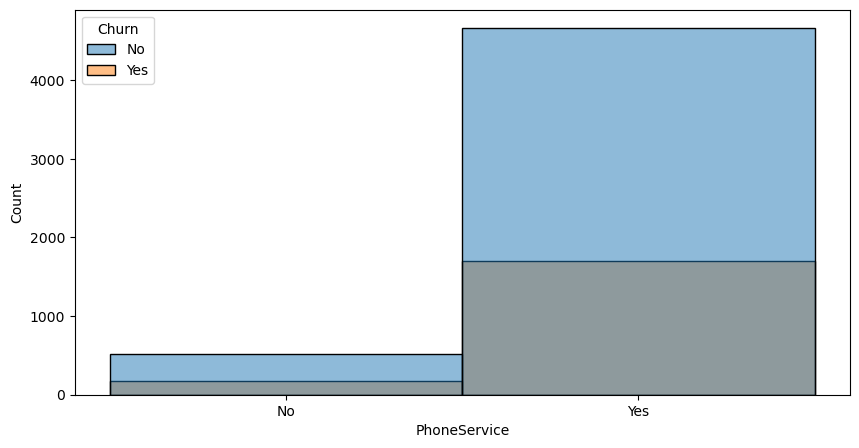

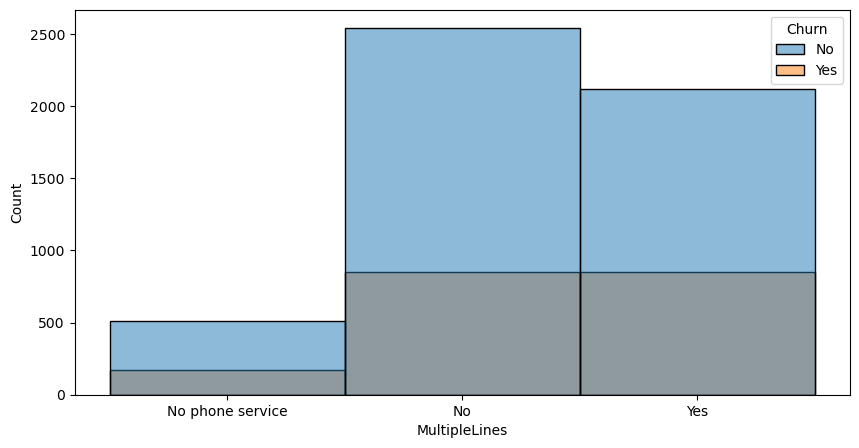

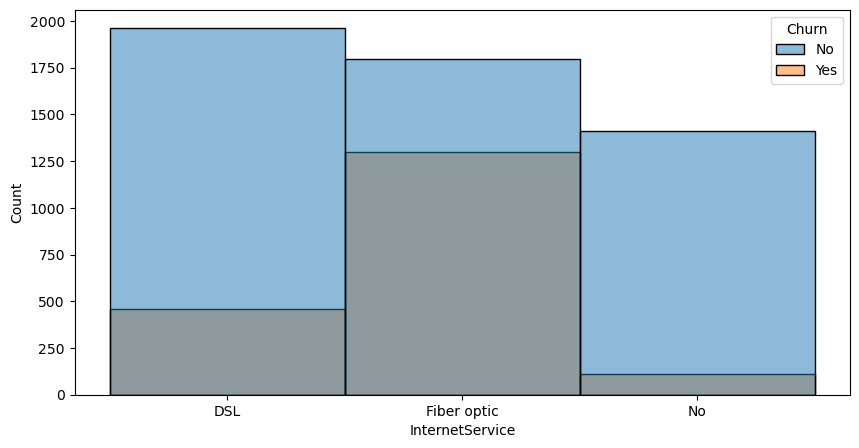

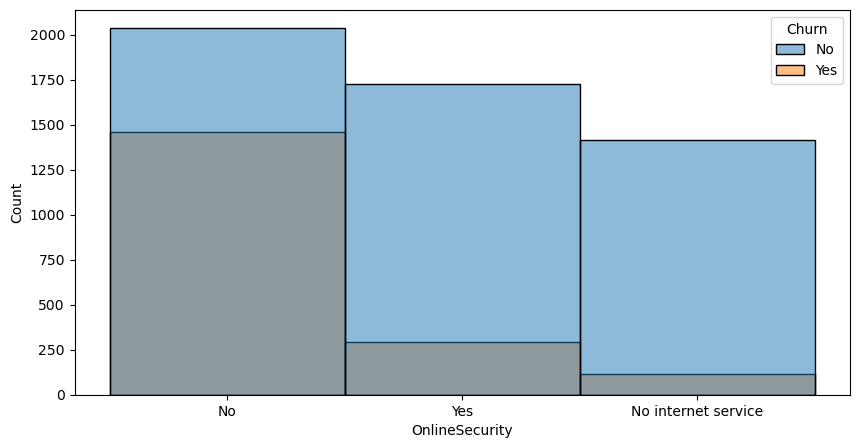

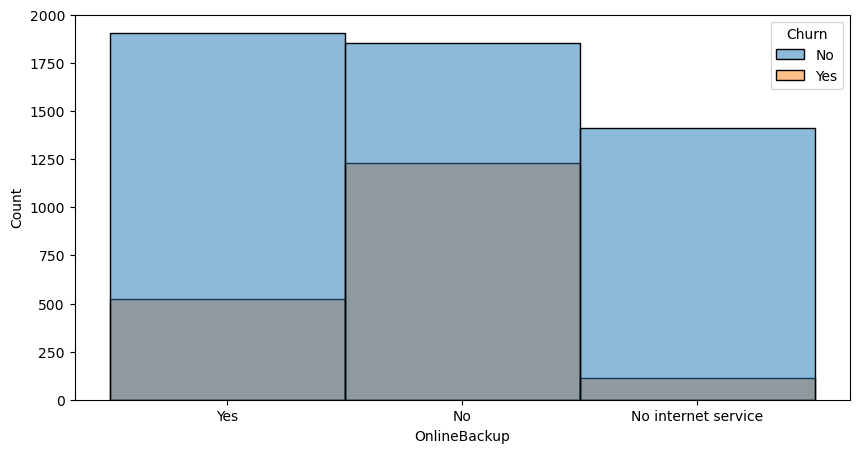

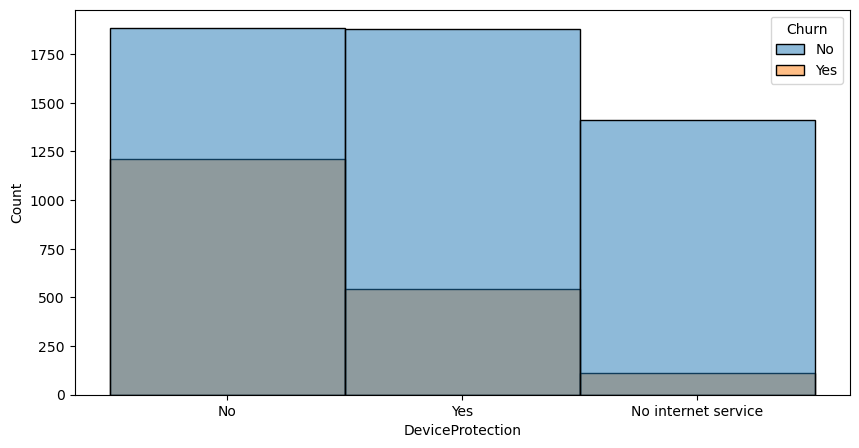

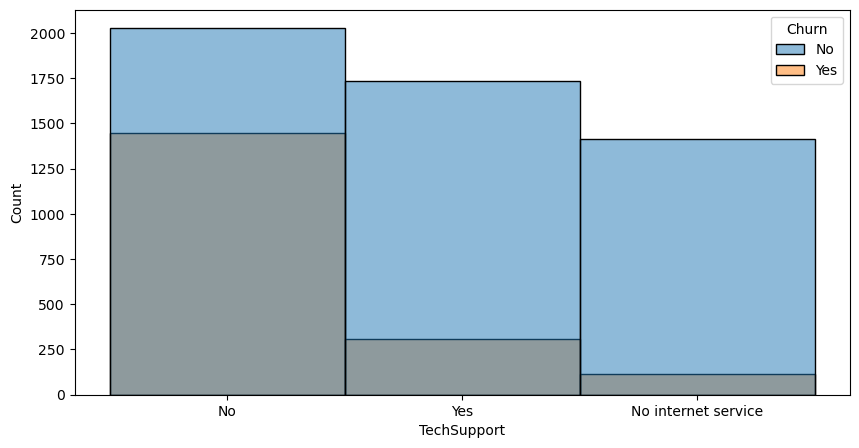

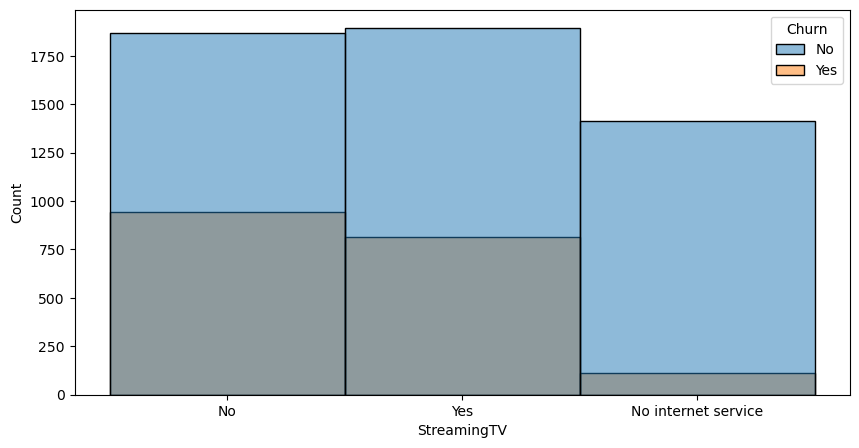

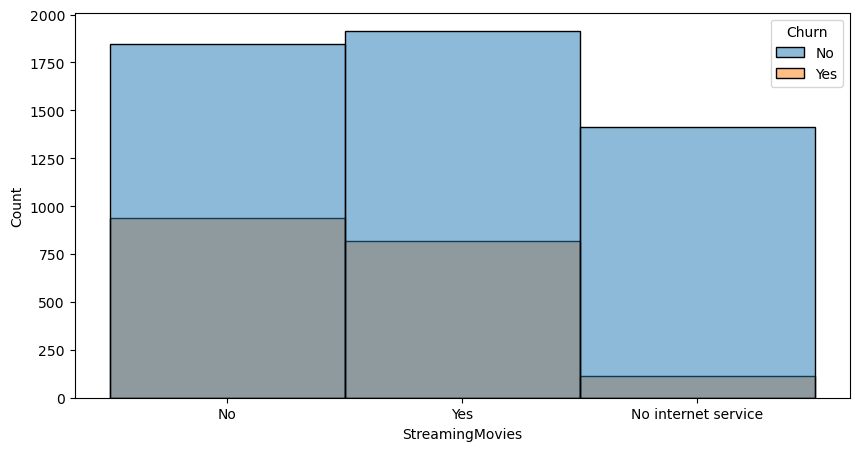

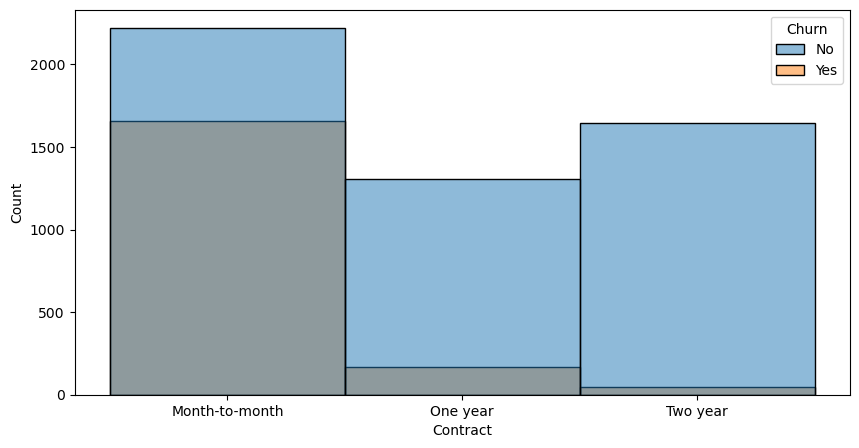

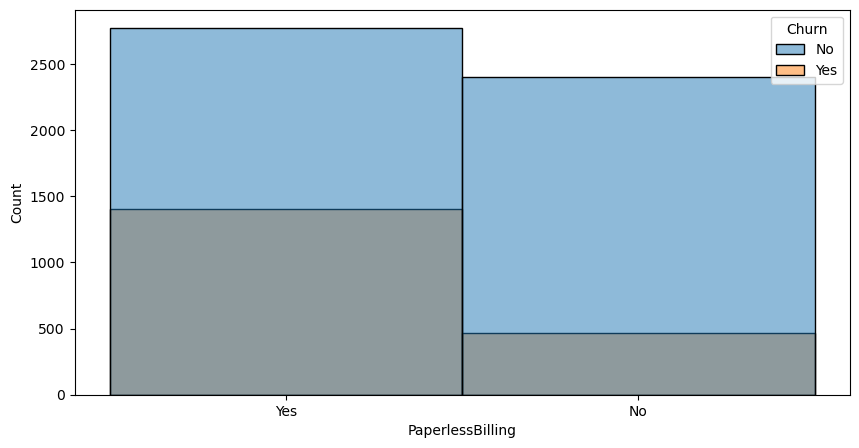

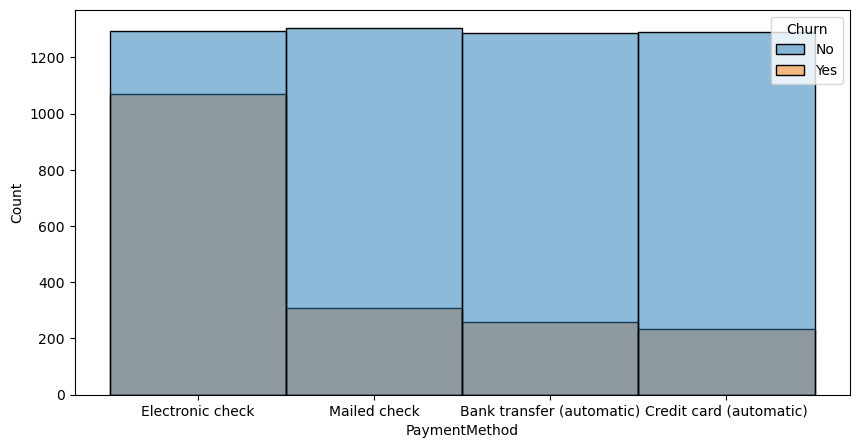

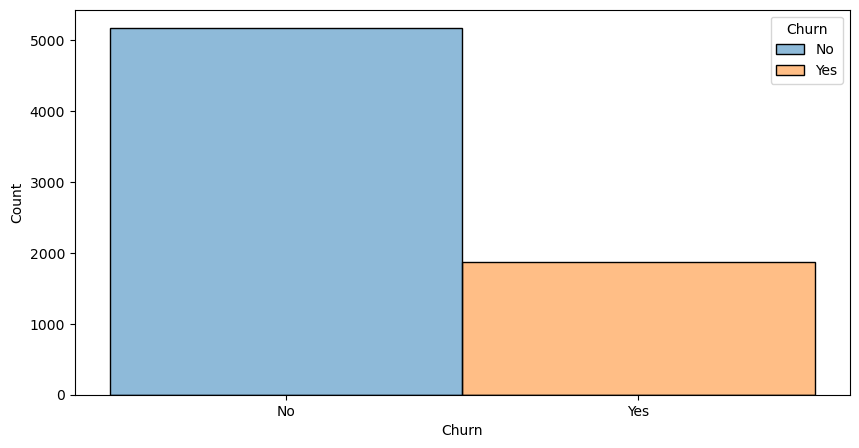

In [44]:
for i in data.columns:
    if (data[i].nunique() < 1000) :
        plt.figure(figsize=(10,5))
        sns.histplot(data, x=data[i], hue = data['Churn'])
        plt.show()

In [45]:
internetService = data['InternetService'].replace(['DSL','Fiber optic','No'], [int(1), int(2), int(0)])

In [46]:
internetService.value_counts()

2    3096
1    2421
0    1526
Name: InternetService, dtype: int64

In [47]:
new_data = data.copy()

In [48]:
new_data['internetService'] = internetService

In [49]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [50]:
no_internets[2]
len(no_internets)

7

## encoding the object type columns


In [51]:
from sklearn.preprocessing import OrdinalEncoder
ordenc = OrdinalEncoder()

making a function for encoding the data

In [52]:
def encoder_func(data):
    
    from sklearn.preprocessing import OrdinalEncoder
    ordenc = OrdinalEncoder()
    
    encoded_data = pd.DataFrame()
    
    for i in data.columns :
        encoded_data[i] = data[i]
        print(i + ' column copied to the encoded_data')
        if data[i].dtype == object:
            encoded_col = np.array(data[i]).reshape(-1,1)
            encoded_col = ordenc.fit_transform(encoded_col)
            print(i + ' column successfully encoded')
            encoded_data[i] = encoded_col
            print(i + ' column successfully replaced with encoded_col')
    return encoded_data

In [53]:
encoded_data = encoder_func(data)
encoded_data.head()

customerID column copied to the encoded_data
customerID column successfully encoded
customerID column successfully replaced with encoded_col
gender column copied to the encoded_data
gender column successfully encoded
gender column successfully replaced with encoded_col
SeniorCitizen column copied to the encoded_data
Partner column copied to the encoded_data
Partner column successfully encoded
Partner column successfully replaced with encoded_col
Dependents column copied to the encoded_data
Dependents column successfully encoded
Dependents column successfully replaced with encoded_col
tenure column copied to the encoded_data
PhoneService column copied to the encoded_data
PhoneService column successfully encoded
PhoneService column successfully replaced with encoded_col
MultipleLines column copied to the encoded_data
MultipleLines column successfully encoded
MultipleLines column successfully replaced with encoded_col
InternetService column copied to the encoded_data
InternetService colum

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0


In [54]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   float64
 1   gender            7043 non-null   float64
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   float64
 4   Dependents        7043 non-null   float64
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   float64
 7   MultipleLines     7043 non-null   float64
 8   InternetService   7043 non-null   float64
 9   OnlineSecurity    7043 non-null   float64
 10  OnlineBackup      7043 non-null   float64
 11  DeviceProtection  7043 non-null   float64
 12  TechSupport       7043 non-null   float64
 13  StreamingTV       7043 non-null   float64
 14  StreamingMovies   7043 non-null   float64
 15  Contract          7043 non-null   float64
 16  PaperlessBilling  7043 non-null   float64


In [55]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [56]:
encoded_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,6104.0,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1550.0,0.0
7,4770.0,0.0,0,0.0,0.0,10,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,29.75,2609.0,0.0
8,5604.0,0.0,0,1.0,0.0,28,1.0,2.0,1.0,0.0,...,2.0,2.0,2.0,2.0,0.0,1.0,2.0,104.80,2646.0,1.0
9,4534.0,1.0,0,0.0,1.0,62,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56.15,3022.0,0.0


TotalCharges column is also converted because it was in object dtype. So, the values changed.
let's analyse this.

In [57]:
encoded_data.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


In [58]:
encoded_data.corr()['Churn']

customerID         -0.017447
gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges        0.014479
Churn               1.000000
Name: Churn, dtype: float64

## despite having float values the 'TotalCharges' column was 'object' dtype

In [59]:
data['TotalCharges'].nunique()

6531

In [60]:
# running the following code yields the below error
# totalCharges = pd.to_numeric(data['TotalCharges'])

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
/opt/conda/lib/python3.7/site-packages/pandas/_libs/lib.pyx in pandas._libs.lib.maybe_convert_numeric()

ValueError: Unable to parse string " "

During handling of the above exception, another exception occurred:

ValueError                                Traceback (most recent call last)
/tmp/ipykernel_27/680788946.py in <module>
----> 1 totalCharges = pd.to_numeric(data['TotalCharges'])

/opt/conda/lib/python3.7/site-packages/pandas/core/tools/numeric.py in to_numeric(arg, errors, downcast)
    182         try:
    183             values, _ = lib.maybe_convert_numeric(
--> 184                 values, set(), coerce_numeric=coerce_numeric
    185             )
    186         except (ValueError, TypeError):

/opt/conda/lib/python3.7/site-packages/pandas/_libs/lib.pyx in pandas._libs.lib.maybe_convert_numeric()

ValueError: Unable to parse string " " at position 488

there is an empty string at index 488

In [61]:
data.loc[[488]]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No


analysing the data I can see that 
total charge = (tenure*monthly charge) + (additional charges based on other services)

In [62]:
data.loc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

i'm trying to find a similar row that has the same services subscribed

In [63]:
data[data['tenure'] == 0]['TotalCharges']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

so it seems that where tenure value = 0 TotalCharges value = is blank. <br>
i'm assuming that they are all new subscribers and have differnt services subscribed. <br>
for now i wil be replacing the blanks with 0s

In [64]:
totalCharges = pd.to_numeric(data['TotalCharges'], errors = 'coerce') # invalid parsing will be set as NaN
totalCharges[488]

nan

In [65]:
totalCharges = totalCharges.replace('nan', 0) # does not work

In [66]:
totalCharges[488]

nan

In [67]:
totalCharges[totalCharges.isnull()] # finding the indexes with nan value

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [68]:
totalCharges.fillna(0, inplace=True)
totalCharges[488]

0.0

null values are replaced with 0, now we will replace the original TotalCharges column with this one.

In [69]:
encoded_dat2 = encoded_data.copy()

In [70]:
encoded_dat2['TotalCharges'] = totalCharges

In [71]:
encoded_dat2.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
7,4770.0,0.0,0,0.0,0.0,10,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,29.75,301.90,0.0
8,5604.0,0.0,0,1.0,0.0,28,1.0,2.0,1.0,0.0,...,2.0,2.0,2.0,2.0,0.0,1.0,2.0,104.80,3046.05,1.0
9,4534.0,1.0,0,0.0,1.0,62,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56.15,3487.95,0.0


In [72]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [73]:
encoded_dat2.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.734304,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [74]:
data[data['TotalCharges'].isnull()] # the null values cannot be identified because those place have a 'space'

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [75]:
data['TotalCharges'][488]

' '

In [76]:
data1 = data.copy()

In [77]:
data1['TotalCharges'] = totalCharges

In [78]:
data1['TotalCharges'][488]

0.0

In [79]:
from sklearn.preprocessing import OrdinalEncoder
ordenc = OrdinalEncoder()

In [80]:
encoded_data2 = pd.DataFrame()
for i in data.columns :
    encoded_data2[i] = data1[i]
    if data[i].dtype == object:
        encoded_col = np.array(data1[i]).reshape(-1,1)
        encoded_col = ordenc.fit_transform(encoded_col)
        print(i + ' column successfully encoded')
        encoded_data2[i] = encoded_col

encoded_data2.head(10)

customerID column successfully encoded
gender column successfully encoded
Partner column successfully encoded
Dependents column successfully encoded
PhoneService column successfully encoded
MultipleLines column successfully encoded
InternetService column successfully encoded
OnlineSecurity column successfully encoded
OnlineBackup column successfully encoded
DeviceProtection column successfully encoded
TechSupport column successfully encoded
StreamingTV column successfully encoded
StreamingMovies column successfully encoded
Contract column successfully encoded
PaperlessBilling column successfully encoded
PaymentMethod column successfully encoded
TotalCharges column successfully encoded
Churn column successfully encoded


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,75.0,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,3625.0,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,537.0,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,3571.0,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,675.0,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,2174.0,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,3674.0,0.0
7,4770.0,0.0,0,0.0,0.0,10,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,29.75,1146.0,0.0
8,5604.0,0.0,0,1.0,0.0,28,1.0,2.0,1.0,0.0,...,2.0,2.0,2.0,2.0,0.0,1.0,2.0,104.80,4385.0,1.0
9,4534.0,1.0,0,0.0,1.0,62,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56.15,4632.0,0.0


In [81]:
data.loc[0]

customerID                7590-VHVEG
gender                        Female
SeniorCitizen                      0
Partner                          Yes
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 29.85
TotalCharges                   29.85
Churn                             No
Name: 0, dtype: object

In [82]:
# encoded_data = ordenc.fit_transform(data)
# encoded_data

In [83]:
columns = data.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## splliting the data

In [84]:
X = encoded_dat2.drop('Churn', axis=1)
y = encoded_dat2['Churn']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)

data is imbalanced, so strtified was enabled later

In [87]:
X.shape, y.shape

((7043, 20), (7043,))

In [88]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4718, 20), (4718,), (2325, 20), (2325,))

In [89]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=0)

## data scaling

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [91]:
train_cols = X_tr.columns
train_cols

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [92]:
X_tr_minmax = scaler.fit_transform(X_tr)
X_tr_minmax = pd.DataFrame(X_tr_minmax, columns = train_cols)

In [93]:
X_val_minmax = scaler.transform(X_val)
X_val_minmax = pd.DataFrame(X_val_minmax, columns = train_cols)
X_test_minmax = scaler.transform(X_test)
X_test_minmax = pd.DataFrame(X_test_minmax, columns = train_cols)

In [94]:
X_tr.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3069,1210.0,0.0,0,0.0,0.0,10,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,20.55,187.35
3222,4837.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.90,111.05
1844,872.0,1.0,0,1.0,0.0,59,1.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,66.40,3958.20
4352,400.0,1.0,0,1.0,1.0,64,1.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,91.80,5960.50
4413,1215.0,0.0,1,0.0,0.0,17,1.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,89.15,1496.90


In [95]:
X_tr_minmax.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.171899,0.0,0.0,0.0,0.0,0.138889,1.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,1.0,1.000000,0.022977,0.021930
1,0.687171,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.266234,0.012999
2,0.123881,1.0,0.0,1.0,0.0,0.819444,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.5,0.0,0.333333,0.481019,0.463313
3,0.056826,1.0,0.0,1.0,1.0,0.888889,1.0,1.0,0.5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.734765,0.697685
4,0.172610,0.0,1.0,0.0,0.0,0.236111,1.0,0.0,0.5,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.666667,0.708292,0.175214


### saving the scaler

In [122]:
import pickle

In [123]:
# saving in .sav format

pickle.dump(scaler, open('Scaler.sav', 'wb'))

In [124]:
# saving in .pkl format

pickle.dump(scaler, open('Scaler.pkl', 'wb'))

## finding corelations between data

In [96]:
encoded_dat2.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.000376,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826178,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.289309


In [97]:
encoded_dat2.corr()['Churn']

customerID         -0.017447
gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges       -0.198324
Churn               1.000000
Name: Churn, dtype: float64

In [98]:
Xy = (X_tr.merge(y_tr, left_index=True, right_index=True))

In [99]:
Xy.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.024634,-0.016481,-0.019849,-0.018899,-0.003379,0.005614,0.000262,-0.016800,-0.017407,...,-0.008761,-0.007373,-0.017628,-0.024975,0.002439,0.020974,0.000586,-0.012964,-0.017633,0.020393
gender,0.024634,1.000000,-0.004866,0.013676,0.027017,-0.002793,0.000131,-0.004906,0.013401,-0.019957,...,-0.002921,-0.010057,-0.014778,0.010803,-0.000046,-0.012131,0.015942,-0.033775,-0.018514,-0.027155
SeniorCitizen,-0.016481,-0.004866,1.000000,0.031061,-0.209884,0.003662,0.005153,0.139502,-0.049046,-0.130440,...,-0.030897,-0.153425,-0.002237,0.055304,-0.148243,0.147217,-0.019413,0.218101,0.095055,0.159574
Partner,-0.019849,0.013676,0.031061,1.000000,0.444924,0.380173,0.013902,0.132366,-0.013618,0.139684,...,0.162629,0.120529,0.134977,0.114796,0.276580,0.004092,-0.159233,0.089118,0.308928,-0.166517
Dependents,-0.018899,0.027017,-0.209884,0.444924,1.000000,0.151165,-0.005400,-0.028063,0.047203,0.140308,...,0.072010,0.114956,0.042687,0.000325,0.231003,-0.099676,-0.036098,-0.137548,0.037310,-0.176972
tenure,-0.003379,-0.002793,0.003662,0.380173,0.151165,1.000000,0.009559,0.352002,-0.023801,0.328700,...,0.375911,0.339774,0.287373,0.284796,0.673782,-0.021230,-0.374505,0.227164,0.814903,-0.348113
PhoneService,0.005614,0.000131,0.005153,0.013902,-0.005400,0.009559,1.000000,-0.020006,0.395469,0.002247,...,-0.005524,-0.009422,0.052918,0.031390,0.006485,0.020067,0.007728,0.240498,0.109708,0.003343
MultipleLines,0.000262,-0.004906,0.139502,0.132366,-0.028063,0.352002,-0.020006,1.000000,-0.147119,0.020697,...,0.135874,0.022333,0.170449,0.189617,0.115390,0.162233,-0.193211,0.440322,0.464929,0.042502
InternetService,-0.016800,0.013401,-0.049046,-0.013618,0.047203,-0.023801,0.395469,-0.147119,1.000000,-0.034058,...,0.041211,-0.014649,0.096822,0.099281,0.117431,-0.140016,0.101090,-0.346114,-0.189603,-0.044964
OnlineSecurity,-0.017407,-0.019957,-0.130440,0.139684,0.140308,0.328700,0.002247,0.020697,-0.034058,1.000000,...,0.187486,0.289900,0.055921,0.062485,0.366642,-0.157951,-0.112512,-0.047593,0.256989,-0.282306


In [100]:
Xy.corr()['Churn']

customerID          0.020393
gender             -0.027155
SeniorCitizen       0.159574
Partner            -0.166517
Dependents         -0.176972
tenure             -0.348113
PhoneService        0.003343
MultipleLines       0.042502
InternetService    -0.044964
OnlineSecurity     -0.282306
OnlineBackup       -0.190945
DeviceProtection   -0.171667
TechSupport        -0.296540
StreamingTV        -0.027493
StreamingMovies    -0.005345
Contract           -0.392435
PaperlessBilling    0.205175
PaymentMethod       0.108840
MonthlyCharges      0.200939
TotalCharges       -0.184907
Churn               1.000000
Name: Churn, dtype: float64

## performance evaluation

### classification metrics

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss

### cross validation

In [102]:
from sklearn.model_selection import cross_validate, StratifiedKFold

skfcv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

## Fitting some model

#### logreg

In [103]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=400, random_state=0)

In [104]:
cv_scores = cross_validate(logreg, X_train, y_train, cv=skfcv)
print(cv_scores)

{'fit_time': array([0.06505036, 0.1095469 , 0.04885602]), 'score_time': array([0.00255728, 0.00202656, 0.00169206]), 'test_score': array([0.80038144, 0.80101716, 0.8129771 ])}


/home/manuar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
logreg.fit(X_tr, y_tr)
y_pred = logreg.predict(X_val)
print('\n Confusion Matrix: \n', confusion_matrix(y_val, y_pred))
print('\n classification_report: \n', classification_report(y_val, y_pred))
print('\n roc_auc_score: ', roc_auc_score(y_val, y_pred))
print('\n log_loss: ', log_loss(y_val, y_pred))


 Confusion Matrix: 
 [[1030  104]
 [ 208  215]]

 classification_report: 
               precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1134
         1.0       0.67      0.51      0.58       423

    accuracy                           0.80      1557
   macro avg       0.75      0.71      0.72      1557
weighted avg       0.79      0.80      0.79      1557


 roc_auc_score:  0.708281736650531

 log_loss:  7.222620332308639


#### KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [107]:
cv_scores = cross_validate(knn, X_train, y_train, cv=skfcv)
print(cv_scores)

{'fit_time': array([0.00352573, 0.00453258, 0.00299549]), 'score_time': array([0.26912475, 0.06890821, 0.06563473]), 'test_score': array([0.70883662, 0.71964399, 0.71183206])}


In [108]:
knn.fit(X_tr, y_tr)
y_pred = knn.predict(X_val)
print('\n Confusion Matrix: \n', confusion_matrix(y_val, y_pred))
print('\n classification_report: \n', classification_report(y_val, y_pred))
print('\n roc_auc_score: ', roc_auc_score(y_val, y_pred))
print('\n log_loss: ', log_loss(y_val, y_pred))


 Confusion Matrix: 
 [[1016  118]
 [ 327   96]]

 classification_report: 
               precision    recall  f1-score   support

         0.0       0.76      0.90      0.82      1134
         1.0       0.45      0.23      0.30       423

    accuracy                           0.71      1557
   macro avg       0.60      0.56      0.56      1557
weighted avg       0.67      0.71      0.68      1557


 roc_auc_score:  0.5614469586100791

 log_loss:  10.301493743196618


#### XGBoost

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)

In [110]:
cv_scores = cross_validate(gbc, X_train, y_train, cv=skfcv)
print(cv_scores)

{'fit_time': array([0.61554837, 0.50190377, 0.5002389 ]), 'score_time': array([0.00402951, 0.00422668, 0.00408578]), 'test_score': array([0.80165289, 0.80356008, 0.80979644])}


In [111]:
gbc.fit(X_tr, y_tr)
y_pred = gbc.predict(X_val)
print('\n Confusion Matrix: \n', confusion_matrix(y_val, y_pred))
print('\n classification_report: \n', classification_report(y_val, y_pred))
print('\n roc_auc_score: ', roc_auc_score(y_val, y_pred))
print('\n log_loss: ', log_loss(y_val, y_pred))


 Confusion Matrix: 
 [[1039   95]
 [ 217  206]]

 classification_report: 
               precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      1134
         1.0       0.68      0.49      0.57       423

    accuracy                           0.80      1557
   macro avg       0.76      0.70      0.72      1557
weighted avg       0.79      0.80      0.79      1557


 roc_auc_score:  0.7016116927464445

 log_loss:  7.222620332308639


In [112]:
X_tr = X_tr_minmax
X_val = X_val_minmax
X_test = X_test_minmax

### logreg

In [113]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)

In [114]:
cv_scores = cross_validate(logreg, X_tr, y_tr, cv=skfcv)
print(cv_scores)

{'fit_time': array([0.02189302, 0.01711345, 0.01332712]), 'score_time': array([0.00295544, 0.00219965, 0.00204039]), 'test_score': array([0.79601518, 0.80265655, 0.81196581])}


In [115]:
logreg.fit(X_tr, y_tr)
y_pred = logreg.predict(X_val)
print('\n Confusion Matrix: \n', confusion_matrix(y_val, y_pred))
print('\n classification_report: \n', classification_report(y_val, y_pred))
print('\n roc_auc_score: ', roc_auc_score(y_val, y_pred))
print('\n log_loss: ', log_loss(y_val, y_pred))


 Confusion Matrix: 
 [[1035   99]
 [ 204  219]]

 classification_report: 
               precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1134
         1.0       0.69      0.52      0.59       423

    accuracy                           0.81      1557
   macro avg       0.76      0.72      0.73      1557
weighted avg       0.80      0.81      0.80      1557


 roc_auc_score:  0.7152144545761566

 log_loss:  7.014275515030506


### saving the logreg model using pickle

In [125]:
import pickle

In [126]:
# saving in .sav format
pickle.dump(logreg, open('Model.sav', 'wb'))

In [127]:
# saving in .pkl format

pickle.dump(scaler, open('Model.pkl', 'wb'))

### KNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [117]:
cv_scores = cross_validate(knn, X_tr, y_tr, cv=skfcv)
print(cv_scores)

{'fit_time': array([0.00361729, 0.00268865, 0.00261426]), 'score_time': array([0.04798865, 0.04721141, 0.04111171]), 'test_score': array([0.75142315, 0.73149905, 0.76353276])}


In [118]:
knn.fit(X_tr, y_tr)
y_pred = knn.predict(X_val)
print('\n Confusion Matrix: \n', confusion_matrix(y_val, y_pred))
print('\n classification_report: \n', classification_report(y_val, y_pred))
print('\n roc_auc_score: ', roc_auc_score(y_val, y_pred))
print('\n log_loss: ', log_loss(y_val, y_pred))


 Confusion Matrix: 
 [[961 173]
 [217 206]]

 classification_report: 
               precision    recall  f1-score   support

         0.0       0.82      0.85      0.83      1134
         1.0       0.54      0.49      0.51       423

    accuracy                           0.75      1557
   macro avg       0.68      0.67      0.67      1557
weighted avg       0.74      0.75      0.75      1557


 roc_auc_score:  0.6672201583549102

 log_loss:  9.0282754153858


### XGBoost

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)

In [120]:
cv_scores = cross_validate(gbc, X_tr, y_tr, cv=skfcv)
print(cv_scores)

{'fit_time': array([0.40111756, 0.35337162, 0.41178322]), 'score_time': array([0.00325775, 0.0032227 , 0.0034163 ]), 'test_score': array([0.79411765, 0.78652751, 0.82621083])}


In [121]:
gbc.fit(X_tr, y_tr)
y_pred = gbc.predict(X_val)
print('\n Confusion Matrix: \n', confusion_matrix(y_val, y_pred))
print('\n classification_report: \n', classification_report(y_val, y_pred))
print('\n roc_auc_score: ', roc_auc_score(y_val, y_pred))
print('\n log_loss: ', log_loss(y_val, y_pred))


 Confusion Matrix: 
 [[1039   95]
 [ 217  206]]

 classification_report: 
               precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      1134
         1.0       0.68      0.49      0.57       423

    accuracy                           0.80      1557
   macro avg       0.76      0.70      0.72      1557
weighted avg       0.79      0.80      0.79      1557


 roc_auc_score:  0.7016116927464445

 log_loss:  7.222620332308639
